In [1]:
import pandas as pd
import numpy as np
import mygene as mygene
import matplotlib.pyplot as plt
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [2]:
df = pd.read_csv('SRP158491_converted.tsv', sep='\t')

In [3]:
test = df.dropna()

In [4]:
test

,Gene,SRR7725764,SRR7725765,SRR7725767,SRR7725768,SRR7725770,SRR7725772,SRR7725773,SRR7725774,SRR7725775,...,SRR7726082,SRR7726083,SRR7726089,SRR7726092,SRR7726094,SRR7726095,SRR7726096,SRR7726097,SRR7726098,SRR7726099
0,TSPAN6,2.101928,2.343620,1.570346,1.572820,2.361766,2.190212,2.800244,2.057596,0.300934,...,2.615572,1.927915,2.073070,2.811638,2.057369,2.739557,2.315317,0.298495,1.938144,2.918885
1,TNMD,0.278321,0.287624,0.280814,0.281787,0.284088,0.291217,0.298453,0.284235,0.300934,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,1.737710,0.313671
2,DPM1,4.855281,5.548896,4.495456,8.283445,5.745943,7.885716,11.211287,9.834449,8.741531,...,8.771915,9.090190,7.663876,8.682166,9.621050,10.621475,9.703150,9.621050,11.558311,7.691080
3,SCYL3,5.124549,3.712005,5.151706,3.665799,3.933344,4.495456,5.106616,4.611205,4.141389,...,5.395311,4.345955,3.932692,4.414083,4.710460,5.782889,4.550033,4.301211,4.032300,4.315347
4,FIRRM,3.168880,3.171492,3.413959,2.727879,2.960411,3.078573,3.157190,2.909566,3.240738,...,3.488574,3.368760,3.558575,3.097808,3.592982,3.521226,2.825980,3.091596,3.037604,3.020869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43318,LOC128092249,0.278321,0.287624,0.280814,0.281787,0.284088,0.291217,0.298453,0.284235,0.300934,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671
43330,ARMCX5-GPRASP2,0.278321,0.287624,0.280814,0.281787,0.284088,0.291217,0.298453,0.284235,0.300934,...,0.300612,0.299476,0.290108,1.817050,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671
43336,LOC112268419,0.278321,0.287624,0.280814,0.281787,0.284088,0.291217,0.298453,0.284235,0.300934,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671
43348,LOC124903324,0.278321,0.287624,0.280814,0.281787,0.284088,0.291217,0.298453,0.284235,0.300934,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671


(array([1.025070e+05, 1.585910e+05, 2.208810e+05, 9.677960e+05,
        2.800078e+06, 1.038028e+06, 0.000000e+00, 2.157400e+04,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 8.000000e+00,
        1.170000e+02, 1.120000e+02, 1.05

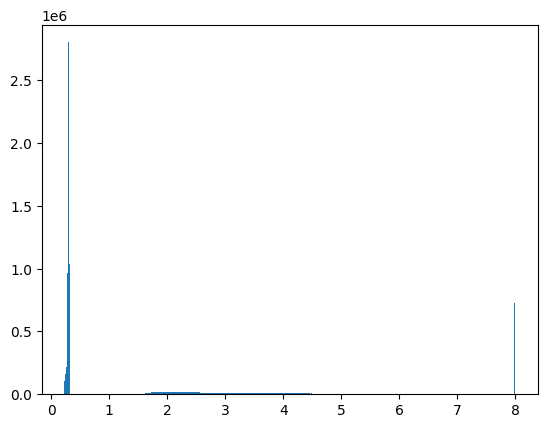

In [20]:
plt.hist(test.iloc[:, 2:].to_numpy().flatten().clip(0, 8), bins=500)

In [15]:
mg = mygene.MyGeneInfo()
query_result = mg.querymany(df['Gene'].tolist(), scopes='ensembl.gene',
                           fields='symbol', species='human')
ensembl_to_hugo = {item['query']: item.get('symbol', '') for item in query_result}
df['Gene'] = df['Gene'].map(ensembl_to_hugo)
df.to_csv('SRP158491_converted.tsv', sep='\t', index=False)

6 input query terms found dup hits:	[('ENSG00000188660', 2), ('ENSG00000249738', 2), ('ENSG00000268674', 3), ('ENSG00000273730', 10), ('
446 input query terms found no hit:	['ENSG00000112096', 'ENSG00000116883', 'ENSG00000130489', 'ENSG00000130723', 'ENSG00000137808', 'ENS


In [4]:
df['Gene'].nunique()

31645

In [ ]:
num_genes = df['Gene'].nunique()
log_scaled_data = np.log1p

## Step 2

In [6]:
### Step 2
import json

In [7]:
with open('aggregated_metadata.json') as file:
    data = json.load(file)


In [67]:
### Create Healthy and Rheumatoid Dataframes
healthy_indices = ['Gene']
rheumatoid_indices = ['Gene']
ifx_indices = ['Gene']
mtx_indices = ['Gene']
non_indices = ['Gene']
tcz_indices = ['Gene']
synovial_indices = ['Gene']
for column in df.columns:
    if(column == 'Gene'):
        continue
    elif data['samples'][column]['refinebio_disease'] == 'healthy':
        healthy_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra ifx treatment':
        rheumatoid_indices.append(column)
        ifx_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra mtx treatment':
        rheumatoid_indices.append(column)
        mtx_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra non treatment':
        rheumatoid_indices.append(column)
        non_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra tcz treatment':
        rheumatoid_indices.append(column)
        tcz_indices.append(column)
    else:
        rheumatoid_indices.append(column)
        synovial_indices.append(column)

In [68]:
print(len(healthy_indices))
print(len(rheumatoid_indices))
print(len(ifx_indices))
print(len(mtx_indices))
print(len(non_indices))
print(len(tcz_indices))
print(len(synovial_indices))

63
215
55
49
58
47
10


In [29]:
len(rheumatoid_indices)

215

In [69]:
healthy_df = test[healthy_indices]
rheumatoid_df = test[rheumatoid_indices]
ifx_df = test[ifx_indices]
mtx_df = test[mtx_indices]
non_df = test[non_indices]
tcz_df = test[tcz_indices]
synovial_df = test[synovial_indices]

In [35]:
rheumatoid_df

,Gene,SRR7725833,SRR7725834,SRR7725835,SRR7725836,SRR7725837,SRR7725838,SRR7725841,SRR7725842,SRR7725843,...,SRR7726082,SRR7726083,SRR7726089,SRR7726092,SRR7726094,SRR7726095,SRR7726096,SRR7726097,SRR7726098,SRR7726099
0,TSPAN6,2.444810,1.682478,2.976068,2.247891,1.371010,2.572447,2.512546,0.304921,1.894436,...,2.615572,1.927915,2.073070,2.811638,2.057369,2.739557,2.315317,0.298495,1.938144,2.918885
1,TNMD,0.290478,0.295647,0.281675,0.290242,0.247588,0.292217,0.311925,0.304921,0.295112,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,1.737710,0.313671
2,DPM1,6.530944,6.614225,6.713727,5.558397,3.300313,5.580212,9.816974,10.772200,8.015876,...,8.771915,9.090190,7.663876,8.682166,9.621050,10.621475,9.703150,9.621050,11.558311,7.691080
3,SCYL3,4.065823,3.358870,3.452993,3.177945,3.004739,3.448925,4.204460,4.570878,4.199553,...,5.395311,4.345955,3.932692,4.414083,4.710460,5.782889,4.550033,4.301211,4.032300,4.315347
4,FIRRM,3.436254,3.243132,2.820856,3.271992,3.975238,3.011211,2.809006,2.841010,3.142473,...,3.488574,3.368760,3.558575,3.097808,3.592982,3.521226,2.825980,3.091596,3.037604,3.020869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43318,LOC128092249,0.290478,0.295647,0.281675,0.290242,0.247588,0.292217,0.311925,0.304921,0.295112,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671
43330,ARMCX5-GPRASP2,0.290478,0.295647,0.281675,0.290242,0.247588,0.292217,0.311925,0.304921,0.295112,...,0.300612,0.299476,0.290108,1.817050,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671
43336,LOC112268419,0.290478,0.295647,0.281675,0.290242,0.247588,0.292217,0.311925,0.304921,0.295112,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671
43348,LOC124903324,0.290478,0.295647,0.281675,0.290242,0.247588,0.292217,0.311925,0.304921,0.295112,...,0.300612,0.299476,0.290108,0.303823,0.303310,0.314886,0.283119,0.298495,0.299811,0.313671


In [70]:
synovial_df

,Gene,SRR7726022,SRR7726023,SRR7726024,SRR7726026,SRR7726027,SRR7726028,SRR7726030,SRR7726031,SRR7726032
0,TSPAN6,0.286624,0.274994,0.238777,1.453799,2.577544,1.499207,1.971568,0.290978,0.284671
1,TNMD,0.286624,0.274994,1.774773,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
2,DPM1,6.066882,4.097133,3.961171,4.837608,6.351054,5.008258,6.552148,9.178756,7.176307
3,SCYL3,3.592525,3.260171,3.465683,3.050830,3.567875,2.983301,3.166990,3.388550,3.565516
4,FIRRM,3.427381,3.775757,2.923236,3.296656,2.969801,3.620965,3.063760,3.018113,3.456971
...,...,...,...,...,...,...,...,...,...,...
43318,LOC128092249,0.286624,0.274994,0.238777,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
43330,ARMCX5-GPRASP2,0.286624,0.274994,0.238777,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
43336,LOC112268419,0.286624,0.274994,0.238777,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
43348,LOC124903324,0.286624,0.274994,0.238777,0.264557,0.283119,1.534483,0.301445,0.290978,0.284671


In [36]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
pca.fit(test.iloc[:, 1:].transpose())

PCA(n_components=2)

In [46]:
len(pca.components_[0])

32636

In [ ]:
rheumatoid_df = test[rheumatoid_indices]
ifx_df = test[ifx_indices]
mtx_df = test[mtx_indices]
non_df = test[non_indices]
tcz_df = test[tcz_indices]
synovial_df = test[synovial_indices]

In [75]:
healthy_pca = pca.transform(healthy_df.iloc[:, 1:].transpose())
rheumatoid_pca = pca.transform(rheumatoid_df.iloc[:, 1:].transpose())
ifx_pca = pca.transform(ifx_df.iloc[:, 1:].transpose())
mtx_pca = pca.transform(mtx_df.iloc[:, 1:].transpose())
non_pca = pca.transform(non_df.iloc[:, 1:].transpose())
tcz_pca = pca.transform(tcz_df.iloc[:, 1:].transpose())
synovial_pca = pca.transform(synovial_df.iloc[:, 1:].transpose())

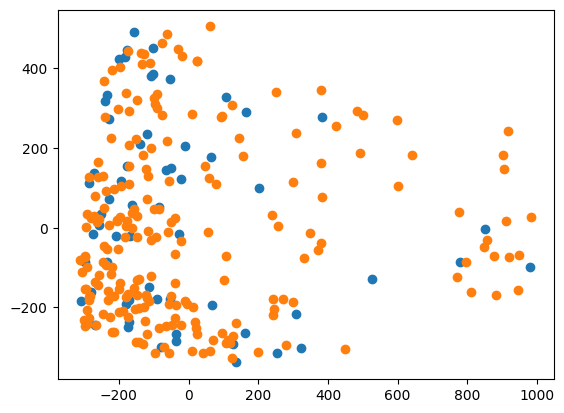

In [76]:
plt.scatter(healthy_pca[:, 0], healthy_pca[:, 1])
plt.scatter(rheumatoid_pca[:, 0], rheumatoid_pca[:, 1])

## Healthy Non-Treatment PCA

Text(0, 0.5, 'Principal Component 2')

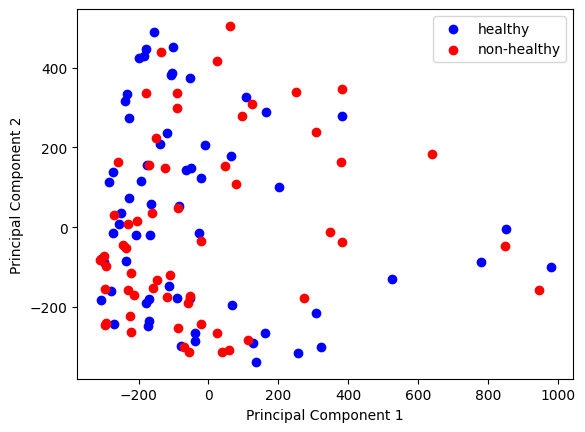

In [87]:
plt.scatter(healthy_pca[:, 0], healthy_pca[:, 1], c='blue', label='healthy')
plt.scatter(non_pca[:, 0], non_pca[:, 1], c='red', label='non-healthy')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## All treatments PCA

In [ ]:
rheumatoid_df = test[rheumatoid_indices]
ifx_df = test[ifx_indices]
mtx_df = test[mtx_indices]
non_df = test[non_indices]
tcz_df = test[tcz_indices]
synovial_df = test[synovial_indices]

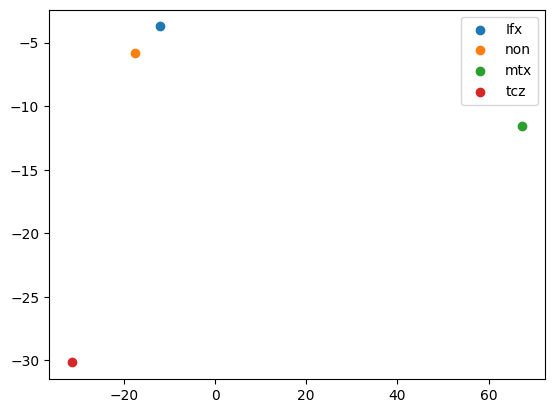

In [80]:
plt.scatter(np.mean(ifx_pca[:, 0]), np.mean(ifx_pca[:, 1]), label='Ifx')
plt.scatter(np.mean(non_pca[:, 0]), np.mean(non_pca[:, 1]), label='non')
plt.scatter(np.mean(mtx_pca[:, 0]), np.mean(mtx_pca[:, 1]), label='mtx')
plt.scatter(np.mean(tcz_pca[:, 0]), np.mean(tcz_pca[:, 1]), label='tcz')
plt.legend()

## T-SNE Boogaloo

In [82]:
from sklearn.manifold import TSNE

## DESeq Boogaloo

In [ ]:
counts_df = load_example_data(
    modality=''
)

In [10]:
wtf = test.iloc[:, 1:].to_numpy()

In [18]:
lol = 2 ** wtf

In [19]:
lol

array([[4.29282676e+00, 5.07574813e+00, 2.96975931e+00, ...,
        1.22986063e+00, 3.83212404e+00, 7.56261520e+00],
       [1.21278227e+00, 1.22062817e+00, 1.21488047e+00, ...,
        1.22986063e+00, 3.33505430e+00, 1.24286657e+00],
       [2.89457748e+01, 4.68149096e+01, 2.25562541e+01, ...,
        7.87453087e+02, 3.01577089e+03, 2.06654921e+02],
       ...,
       [1.21278227e+00, 1.22062817e+00, 1.21488047e+00, ...,
        1.22986063e+00, 1.23098282e+00, 1.24286657e+00],
       [1.21278227e+00, 1.22062817e+00, 1.21488047e+00, ...,
        1.22986063e+00, 1.23098282e+00, 1.24286657e+00],
       [1.21278227e+00, 1.22062817e+00, 1.21488047e+00, ...,
        1.22986063e+00, 1.23098282e+00, 1.24286657e+00]])